<a href="https://colab.research.google.com/github/hejazn86/NLP_IMBD_reviews/blob/master/main_NLP_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing libraries
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)
print(tfds.__version__)

2.2.0
2.1.0


In [16]:
#importing the data from tensorflow_datasets
import numpy as np

imbd, info = tfds.load("imdb_reviews", with_info= True, as_supervised=True)
train_set, test_set = imbd['train'], imbd['test']

print(train_set)

train_sentences = []
train_labels = []

test_sentences = []
test_labels = []

for s, l in train_set :
  train_sentences.append(s.numpy().decode('utf8'))
  train_labels.append(l.numpy())

for s, l in test_set:
  test_sentences.append(s.numpy().decode('utf8'))
  test_labels.append(l.numpy())


train_sentences = np.array(train_sentences)
test_sentences = np.array(test_sentences)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
print(train_labels.shape)
print(train_sentences[0])

<DatasetV1Adapter shapes: ((), ()), types: (tf.string, tf.int64)>
(25000,)
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words= 10000
embadding_output_dim = 15

tokenizer = Tokenizer(num_words= num_words, oov_token = 'unkw')
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded_sequences = pad_sequences(train_sequences, maxlen=150, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_sequences = pad_sequences(test_sequences, maxlen=150, padding='post', truncating='post')

In [18]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, embadding_output_dim, input_length=150),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['acc'])

In [49]:
history = model.fit(train_padded_sequences, train_labels, epochs=20, validation_data=(test_padded_sequences, test_labels))

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0849 - acc: 0.9759 - val_loss: 0.7403 - val_acc: 0.8101
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0763 - acc: 0.9795 - val_loss: 0.7977 - val_acc: 0.8042
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0687 - acc: 0.9820 - val_loss: 0.8446 - val_acc: 0.8006
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0603 - acc: 0.9856 - val_loss: 0.9147 - val_acc: 0.8000
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0541 - acc: 0.9871 - val_loss: 0.9832 - val_acc: 0.7962
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0489 - acc: 0.9880 - val_loss: 1.0322 - val_acc: 0.7937
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0427 - acc: 0.9906 - val_loss: 1.1245 - val_acc: 0.7960
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.

782/782 [==============================] - 1s 1ms/step - loss: 1.8843 - acc: 0.7873


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


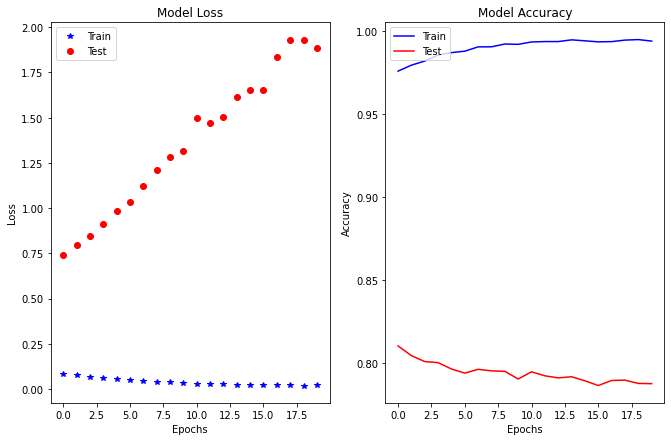

In [56]:
val_loss, val_acc = model.evaluate(test_padded_sequences, test_labels)

import matplotlib.pyplot as plt

epochs = range(len(history.history['acc']))


plt.figure(figsize=(11, 7))
plt.subplot(121).plot(epochs, history.history['loss'], 'b*')
plt.subplot(121).plot(epochs, history.history['val_loss'], 'ro')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(122).plot(epochs, history.history['acc'], 'b')
plt.subplot(122).plot(epochs, history.history['val_acc'], 'r')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')